In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
folfer = 'data'
file = 'delhi_NO2_zonalStats.csv'
path = os.path.join(folfer, file)
print(path)

data/delhi_NO2_zonalStats.csv


In [10]:
df = pd.read_csv(path)

In [11]:
df.head()

,ward,zone,wardno,year,month,mode
0,cantonment,NaN,999,2018.0,7.0,0.000143
1,parliment,NaN,998,2018.0,7.0,0.000159
2,Mayur Vihar Phase I,Shahadra South,209,2018.0,7.0,0.000171
3,Dellopura I,Shahadra South,210,2018.0,7.0,0.000181
4,New Ashok Nagar,Shahadra South,212,2018.0,7.0,0.000170


In [12]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df.head()

,ward,zone,wardno,year,month,mode,date
0,cantonment,NaN,999,2018.0,7.0,0.000143,2018-07-01
1,parliment,NaN,998,2018.0,7.0,0.000159,2018-07-01
2,Mayur Vihar Phase I,Shahadra South,209,2018.0,7.0,0.000171,2018-07-01
3,Dellopura I,Shahadra South,210,2018.0,7.0,0.000181,2018-07-01
4,New Ashok Nagar,Shahadra South,212,2018.0,7.0,0.000170,2018-07-01


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13524 entries, 0 to 13523
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ward    13524 non-null  object        
 1   zone    13432 non-null  object        
 2   wardno  13524 non-null  int64         
 3   year    13524 non-null  float64       
 4   month   13524 non-null  float64       
 5   mode    13524 non-null  float64       
 6   date    13524 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 739.7+ KB


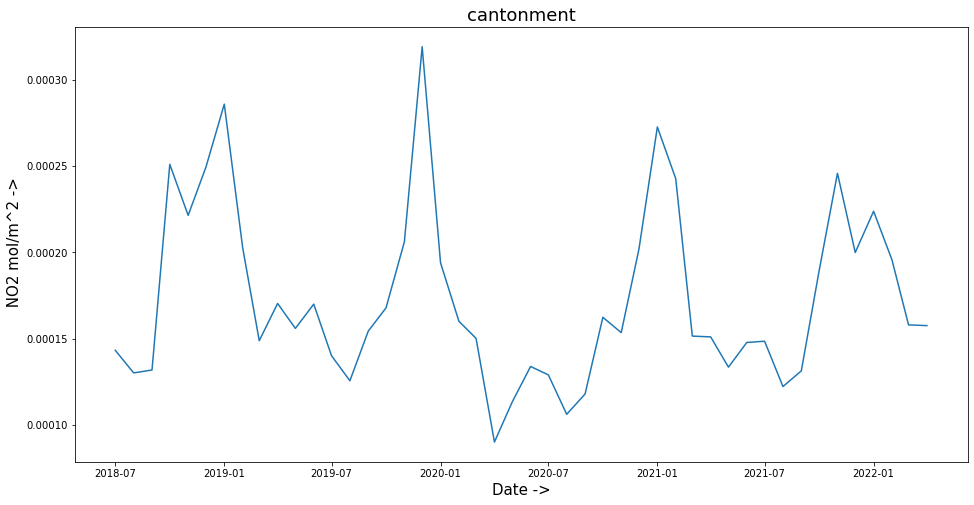

In [24]:
ward = 'cantonment'
dfWard = df[df['ward'] == ward]
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16,8)
plt.plot(dfWard["date"], dfWard["mode"])
plt.title(ward, fontsize = 18)
plt.xlabel('Date ', size = 15)
plt.ylabel(' NO2 mol/m^2 ', size = 15)
plt.show()

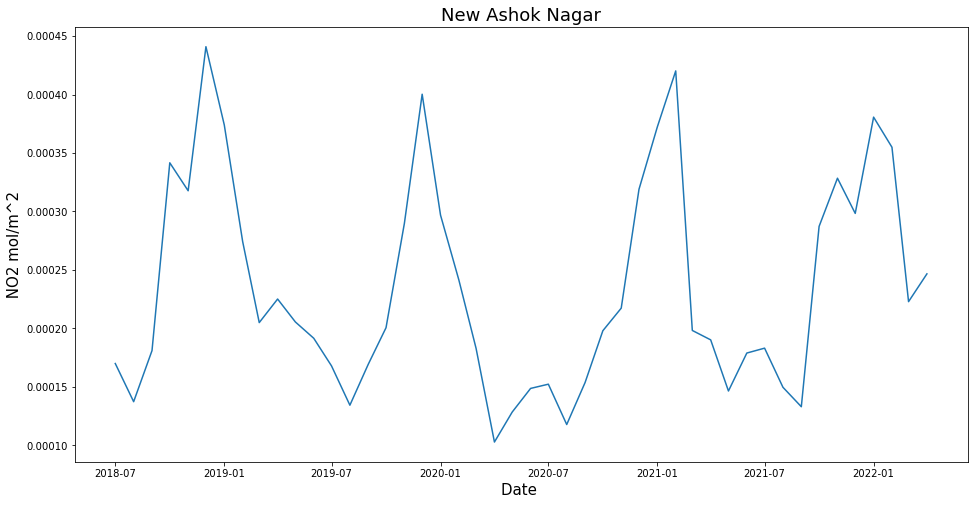

In [25]:
ward = 'New Ashok Nagar'
dfWard = df[df['ward'] == ward]
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16,8)
plt.plot(dfWard["date"], dfWard["mode"])
plt.title(ward, fontsize = 18)
plt.xlabel('Date ', size = 15)
plt.ylabel(' NO2 mol/m^2 ', size = 15)
plt.show()

In [27]:
df['zone'].unique()

array([nan, 'Shahadra South', 'Shahadra North', 'South', 'Central',
       'City', 'Civil Line', 'Narela', 'Rohini', 'Nazafgarh', 'West',
       'Sadar Paharganj', 'Karol Bagh'], dtype=object)

In [36]:
zones = df.groupby(['zone', 'year', 'month']).agg('mean')
zones

wardno      mode
zone    year   month                      
Central 2018.0 7.0    189.333333  0.000173
               8.0    189.333333  0.000136
               9.0    189.333333  0.000160
               10.0   189.333333  0.000330
               11.0   189.333333  0.000285
...                          ...       ...
West    2021.0 12.0   103.888889  0.000213
        2022.0 1.0    103.888889  0.000249
               2.0    103.888889  0.000210
               3.0    103.888889  0.000156
               4.0    103.888889  0.000154

[552 rows x 2 columns]

In [28]:
Central = zones.get_group('Central')
Central

,ward,zone,wardno,year,month,mode,date
97,Lajpat Nagar,Central,155,2018.0,7.0,0.000176,2018-07-01
98,Bhogal,Central,156,2018.0,7.0,0.000176,2018-07-01
99,Kasturba Nagar,Central,157,2018.0,7.0,0.000175,2018-07-01
100,Kotla Mubarakpur,Central,158,2018.0,7.0,0.000173,2018-07-01
101,Adnisganj,Central,159,2018.0,7.0,0.000174,2018-07-01
...,...,...,...,...,...,...,...
13352,Savita Vihar,Central,208,2022.0,4.0,0.000222,2022-04-01
13353,Sriniwaspuri,Central,193,2022.0,4.0,0.000234,2022-04-01
13354,Okhla,Central,206,2022.0,4.0,0.000237,2022-04-01
13355,Sriniwaspuri,Central,193,2022.0,4.0,0.000234,2022-04-01


In [46]:
d = df.groupby(['zone', 'year', 'month', 'date']).agg(['mean'])['mode']
d

mean
zone    year   month date                
Central 2018.0 7.0   2018-07-01  0.000173
               8.0   2018-08-01  0.000136
               9.0   2018-09-01  0.000160
               10.0  2018-10-01  0.000330
               11.0  2018-11-01  0.000285
...                                   ...
West    2021.0 12.0  2021-12-01  0.000213
        2022.0 1.0   2022-01-01  0.000249
               2.0   2022-02-01  0.000210
               3.0   2022-03-01  0.000156
               4.0   2022-04-01  0.000154

[552 rows x 1 columns]

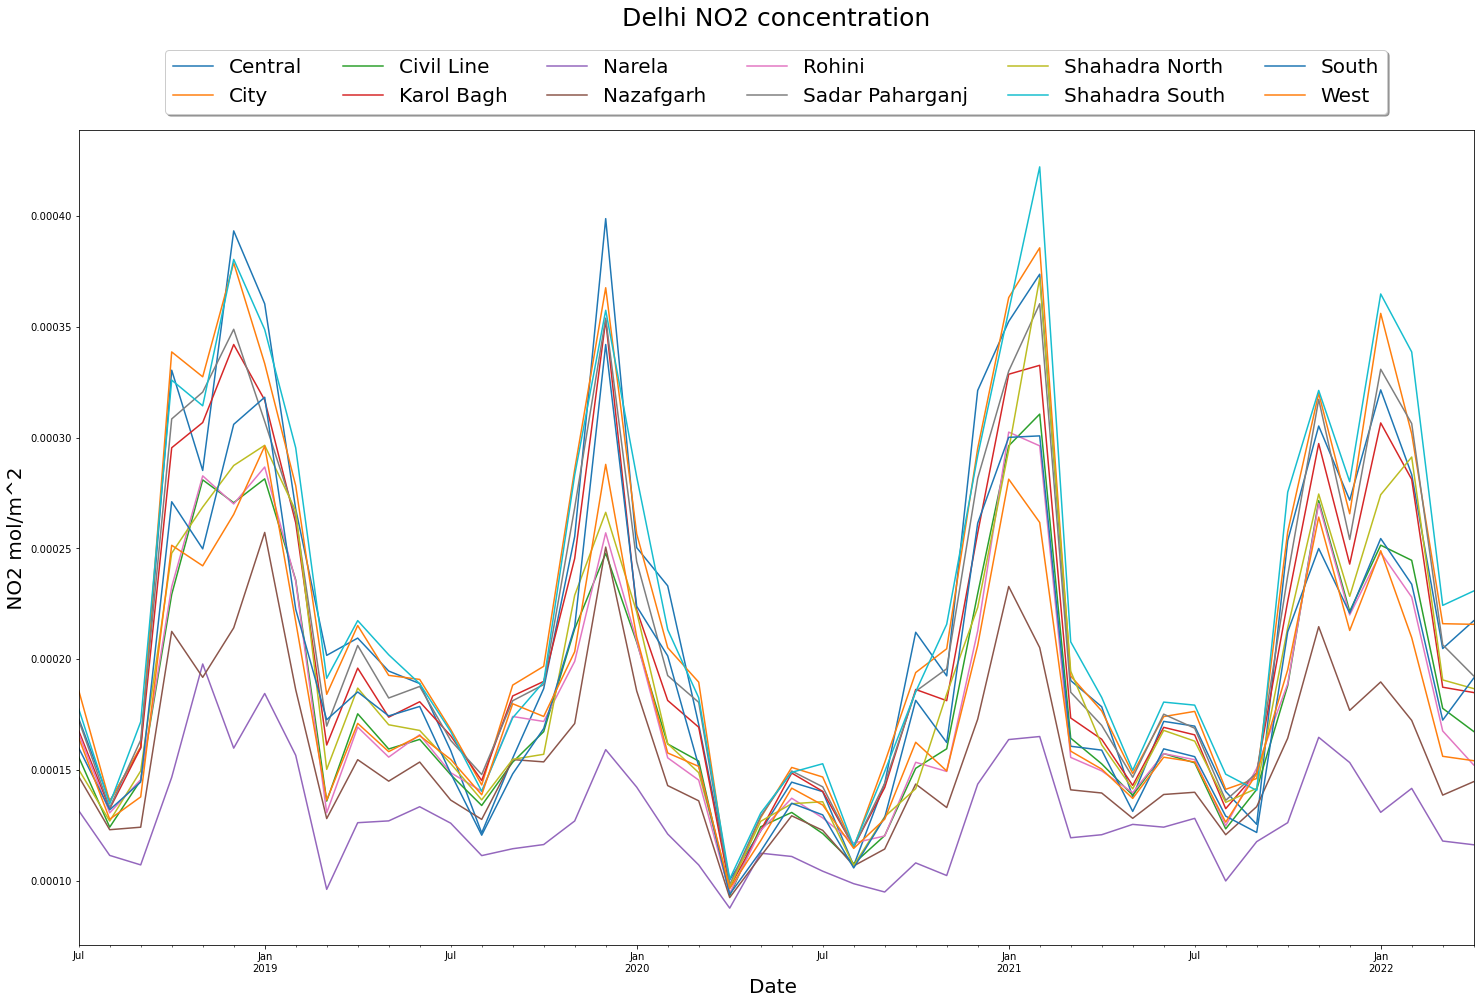

In [97]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(25,15)

pd.pivot_table(df.reset_index(),  index='date', columns='zone', values='mode', aggfunc='mean' ).plot(ax=ax)

plt.legend(loc='upper center', ncol=6, frameon=True, bbox_to_anchor=(0.5, 1.11), fancybox=True, shadow=True, fontsize=20)
plt.xlabel('Date ', size = 20)
plt.ylabel(' NO2 mol/m^2 ', size = 20)
plt.title('Delhi NO2 concentration', size = 25, y=1.12)
output_folder = 'output'
output_path = os.path.join(output_folder, 'NO2_timeseries.jpg')
plt.savefig(output_path)
plt.show()